In [1]:
!pip install dabl

In [1]:
#for mathematical operations
import numpy as np
#for data manipulations
import pandas as pd
#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
#for data analysis
import dabl

In [2]:
#load the dataset
df = pd.read_csv(r'C:\Users\Hp\Downloads\Customers-Base-Segregator\EDA on Ecommerce Data\Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.sample()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
74,75,Male,59,54,47


In [7]:
df.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
111,112,Female,19,63,54
23,24,Male,31,25,73


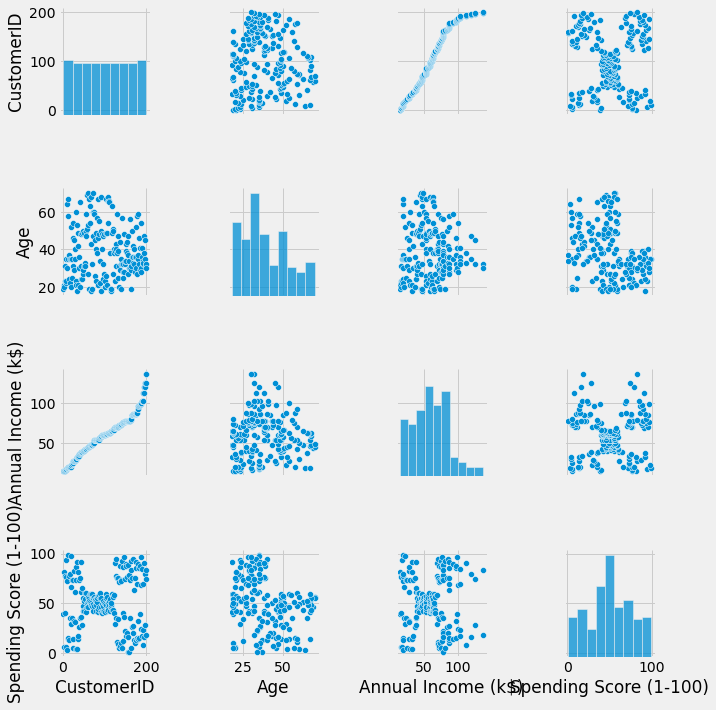

In [8]:
#data visualization
sns.pairplot(df)
plt.show()

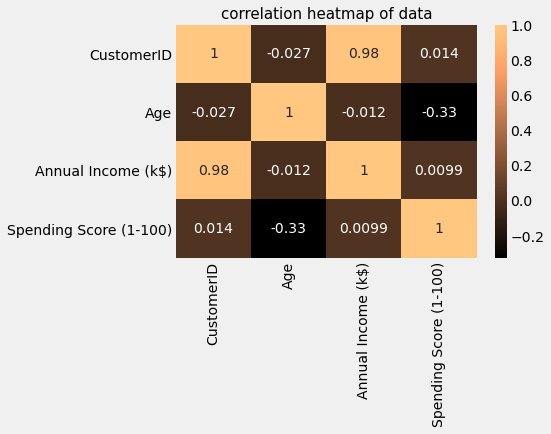

In [9]:
#correlation heatmap
sns.heatmap(df.corr(), annot = True , cmap = 'copper')  #annot = true means it will show the values in heatmap 
plt.title('correlation heatmap of data', fontsize = 15)
plt.show()

Target looks like regression


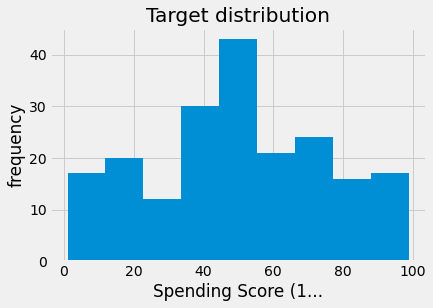

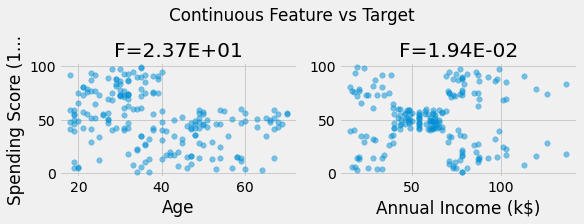

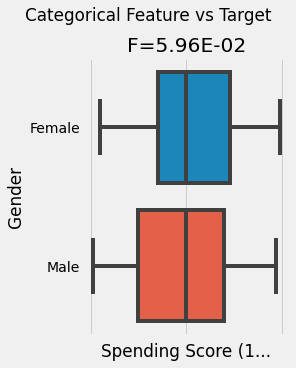

In [10]:
#analyze data with spending score
dabl.plot(df, target_col = 'Spending Score (1-100)')

Target looks like regression


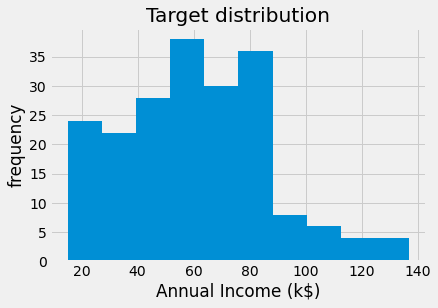

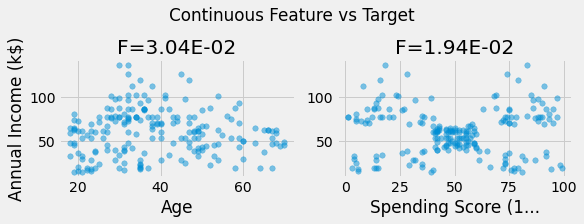

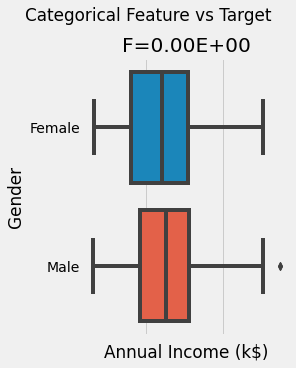

In [11]:
dabl.plot(df, target_col = 'Annual Income (k$)')

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
#descibe categorical data
df.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [14]:
#check null values
df.isnull().any().any()

False

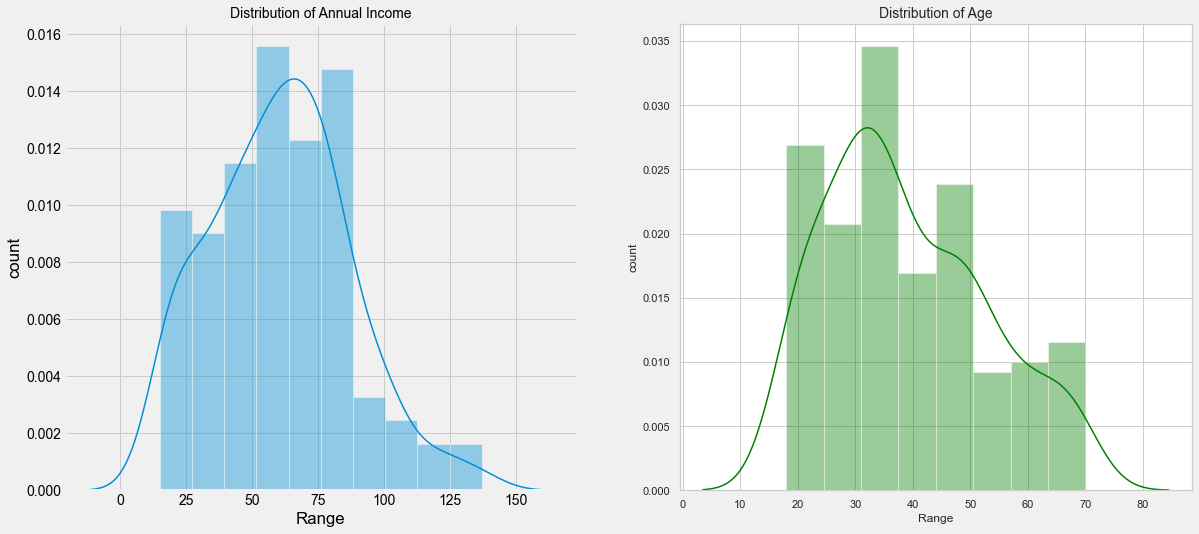

In [15]:
#data visualization
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title("Distribution of Annual Income", fontsize = 14)
plt.xlabel('Range')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'Green')
plt.title("Distribution of Age", fontsize = 14)
plt.xlabel('Range')
plt.ylabel('count')
plt.show()

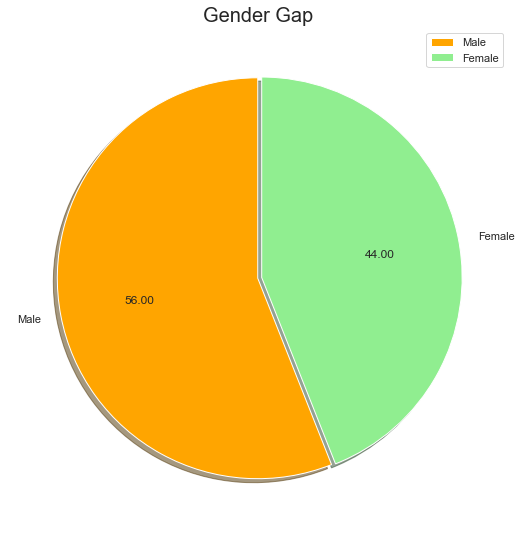

In [16]:
#pie chart to visualize the gender gap
labels = ['Male', 'Female']
size = df['Gender'].value_counts()
colors = ['orange', 'lightgreen']
explode = [0,0.02]

plt.rcParams['figure.figsize'] = (8,9)
plt.pie(size, colors = colors, labels= labels, explode = explode, shadow = True, startangle = 90, autopct = '%.2f')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

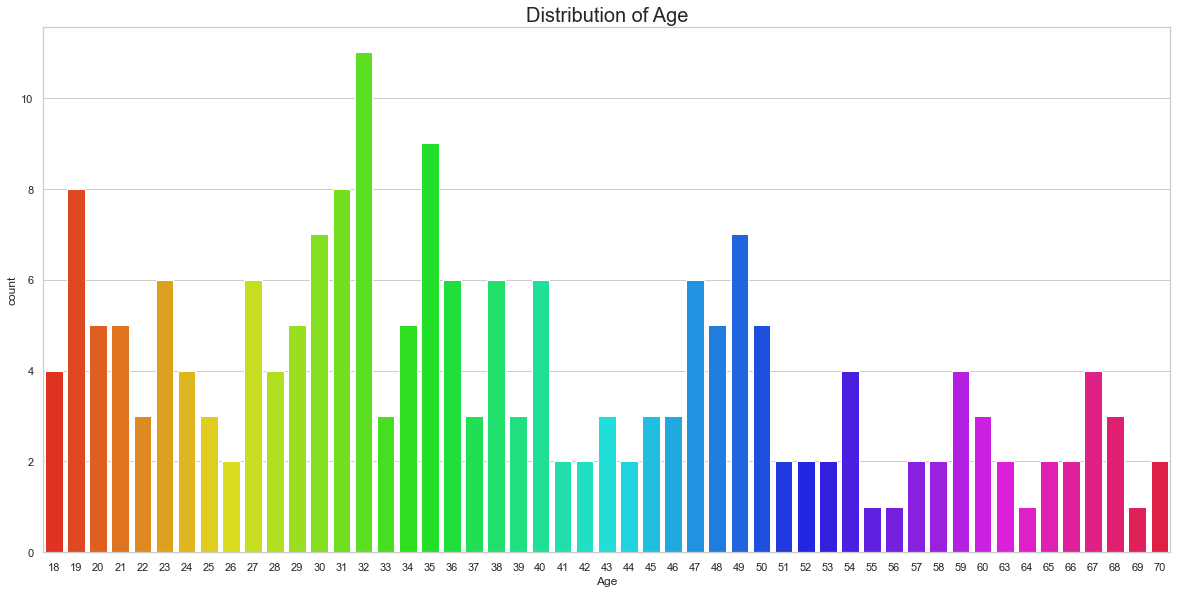

In [17]:
plt.rcParams['figure.figsize'] = (18,9)
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

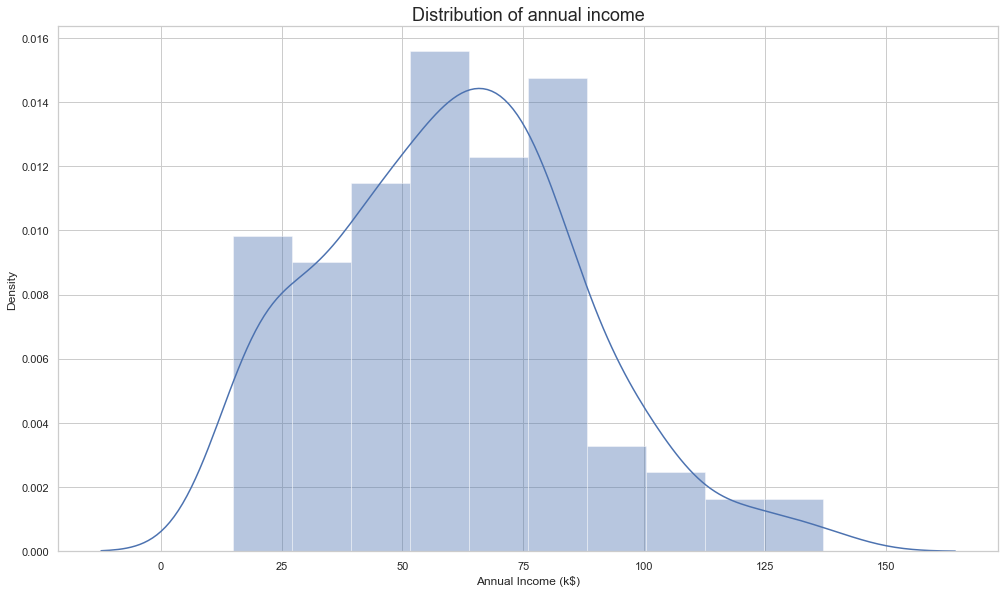

In [18]:
#distribution of annual income
plt.rcParams['figure.figsize'] = (15,9)
sns.distplot(df['Annual Income (k$)'])
plt.title("Distribution of annual income", fontsize=18)
plt.show()

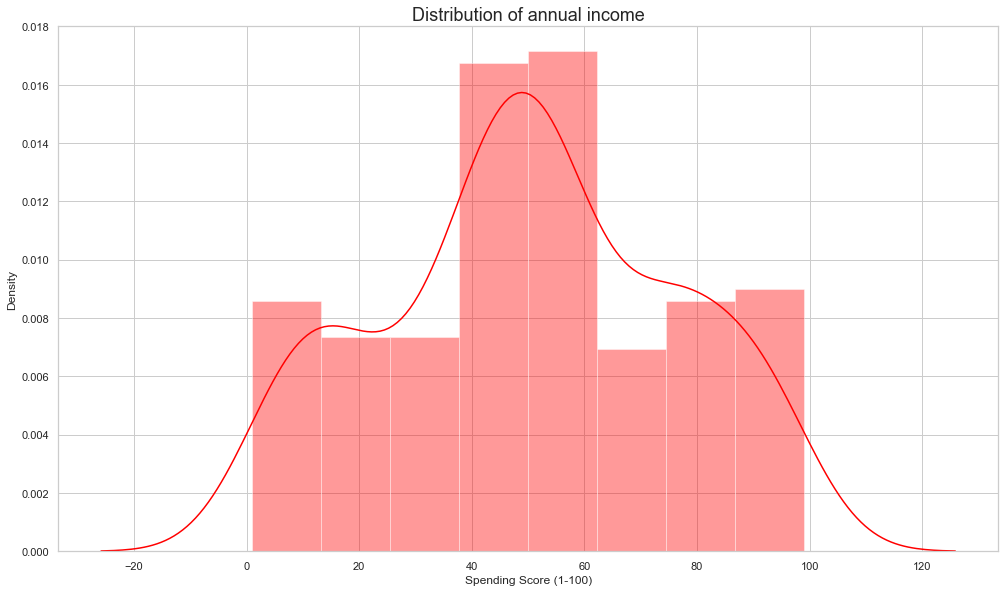

In [19]:
#distribution of spending score
plt.rcParams['figure.figsize'] = (15,9)
sns.distplot(df['Spending Score (1-100)'], color='Red')
plt.title("Distribution of annual income", fontsize=18)
plt.show()

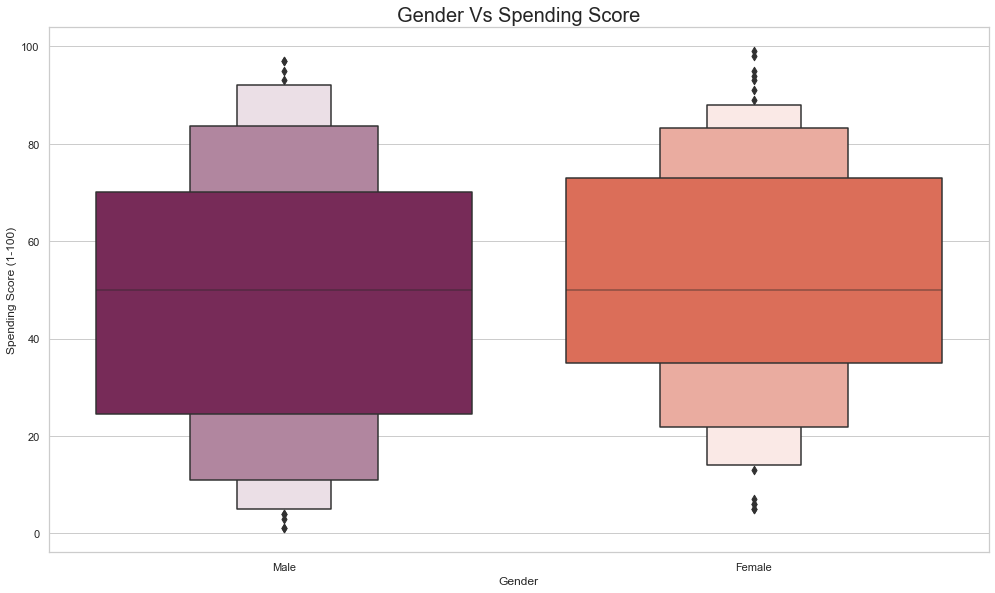

In [20]:
#gender vs spending score
plt.rcParams['figure.figsize'] = (15,9)
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette = 'rocket')
plt.title("Gender Vs Spending Score", fontsize=20)
plt.show()

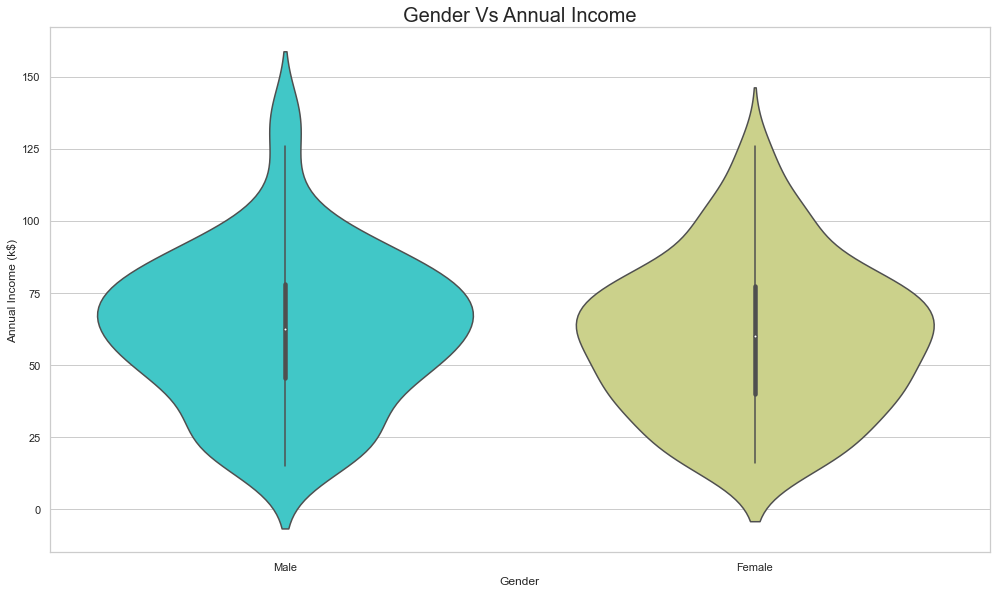

In [21]:
#gender vs annual income
plt.rcParams['figure.figsize'] = (15,9)
sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette = 'rainbow')
plt.title("Gender Vs Annual Income", fontsize=20)
plt.show()

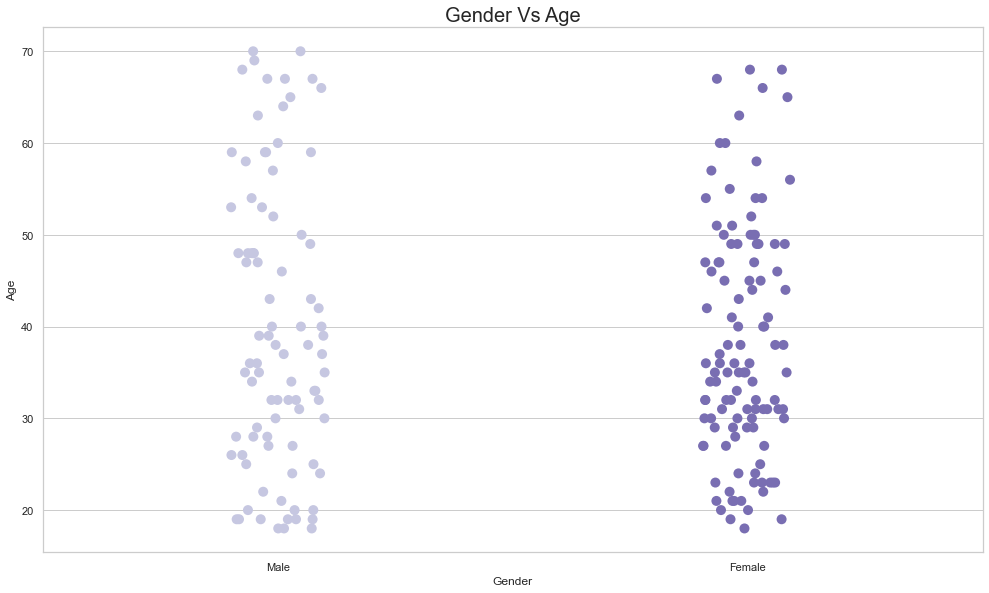

In [22]:
#gender vs age
plt.rcParams['figure.figsize'] = (15,9)
sns.stripplot(df['Gender'], df['Age'], palette = 'Purples', size =10)
plt.title("Gender Vs Age", fontsize=20)
plt.show()

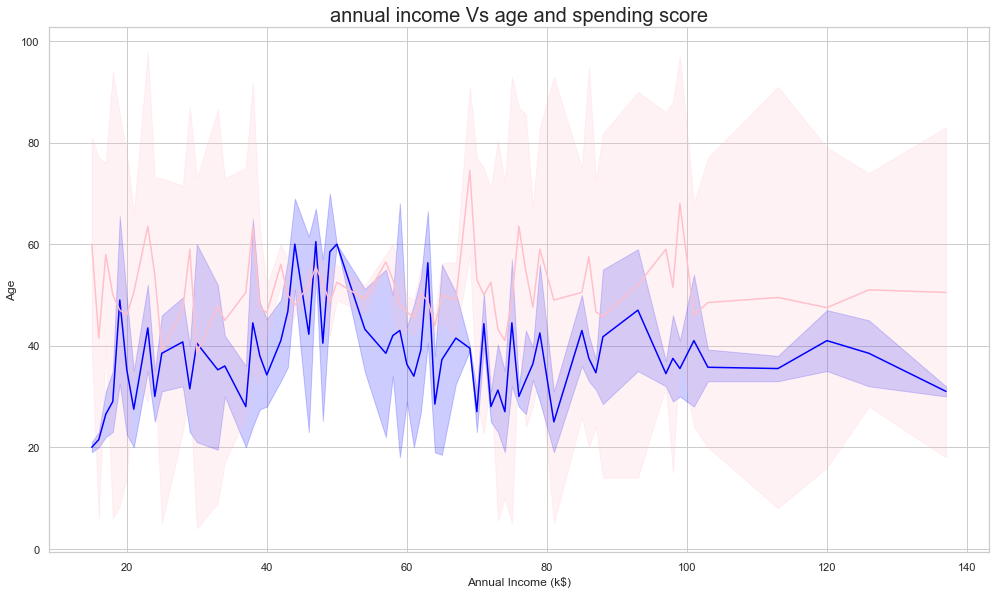

In [23]:
#annual income vs age and spending score
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x,y, color = 'blue')
sns.lineplot(x,z, color = 'pink')
plt.title('annual income Vs age and spending score', fontsize = 20)
plt.show()

In [24]:
#clustering analysis
warnings.filterwarnings('ignore')

x = df.loc[:,['Spending Score (1-100)','Annual Income (k$)']].values
x.shape

(200, 2)

In [25]:
#converting x to data frame
x_df = pd.DataFrame(x)
x_df.head()
# here 0--> spending score and 1--> annual income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


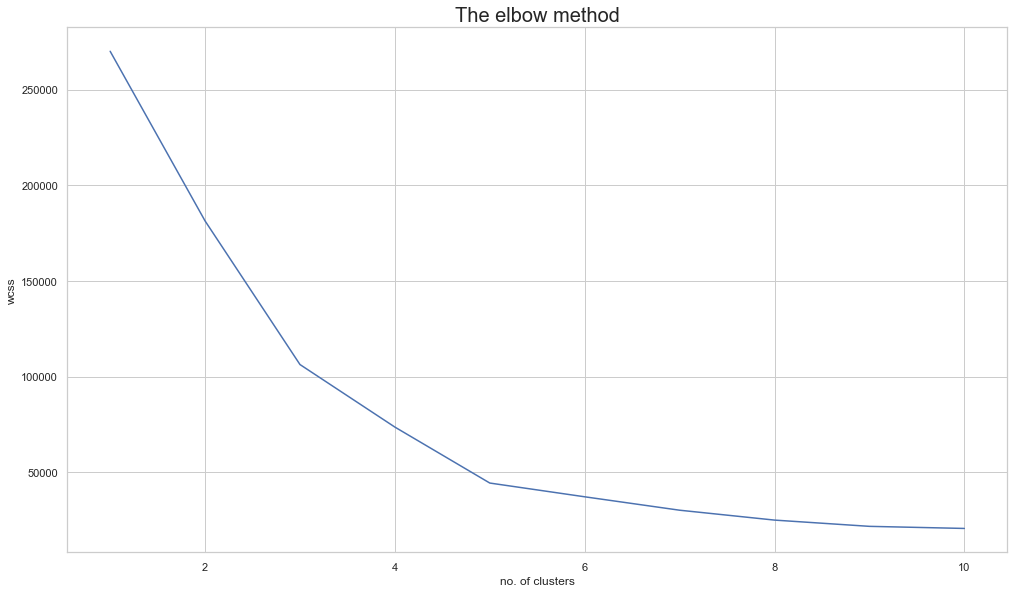

In [26]:
#k means algorithm
#using elbow method
from sklearn.cluster import KMeans
 
wcss = []
for i in range(1,11):
    km= KMeans(n_clusters = i, init= 'k-means++', max_iter= 300, n_init=10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The elbow method', fontsize=20)
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

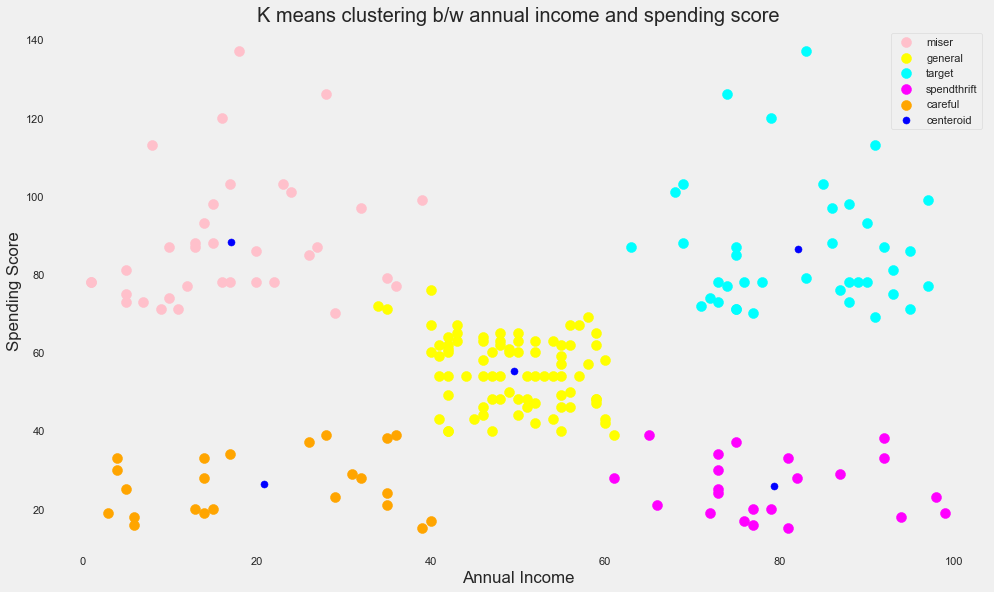

In [27]:
#visualize the k-means clustering
plt.style.use('fivethirtyeight')

km= KMeans(n_clusters = 5, init= 'k-means++', max_iter= 300, n_init=10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='magenta', label='spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c='orange', label='careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s=50, c='blue', label='centeroid')

plt.style.use('fivethirtyeight')
plt.title("K means clustering b/w annual income and spending score", fontsize= 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [28]:
#clustering b/w age and spending score


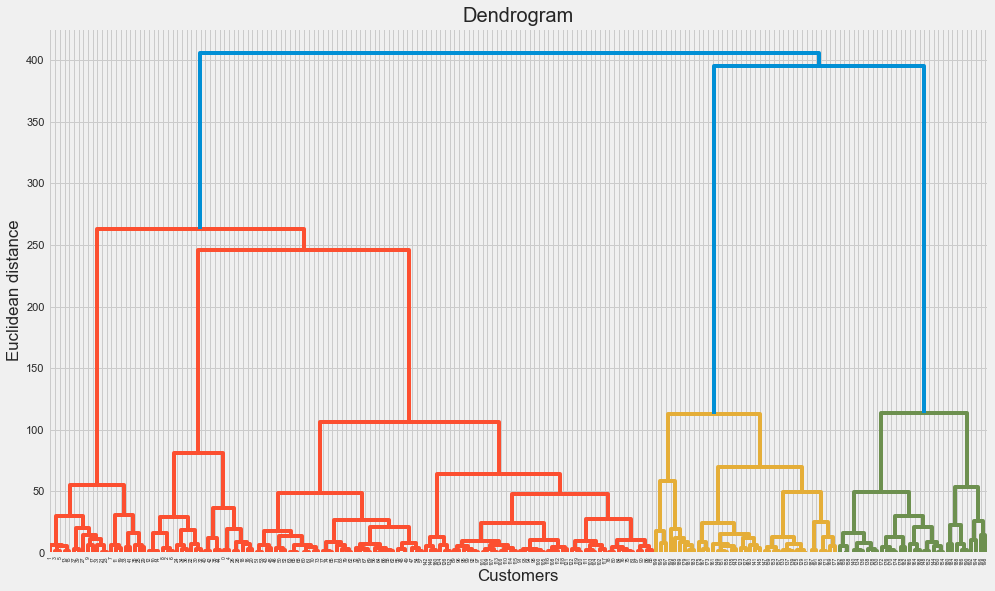

In [29]:
#hierarchical clustering analysis
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method= 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

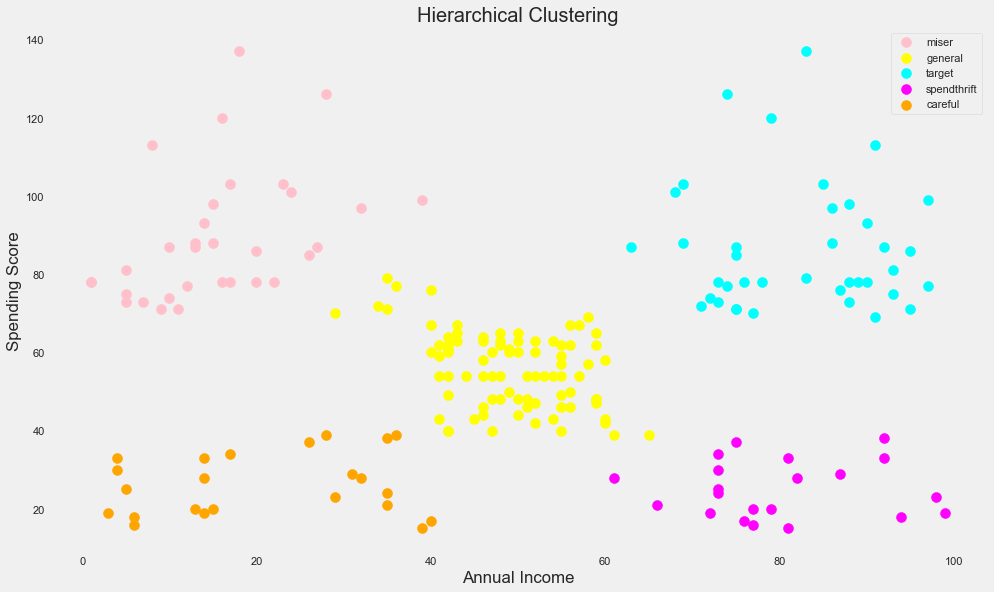

In [30]:
#we cut the dendrogram at the place where the gap is comparetivel greater than the other gaps

from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c='pink', label='miser')
plt.scatter(x[y_hc== 1, 0], x[y_hc == 1, 1], s=100, c='yellow', label='general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c='cyan', label='target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=100, c='magenta', label='spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=100, c='orange', label='careful')

plt.style.use('fivethirtyeight')
plt.title('Hierarchical Clustering', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

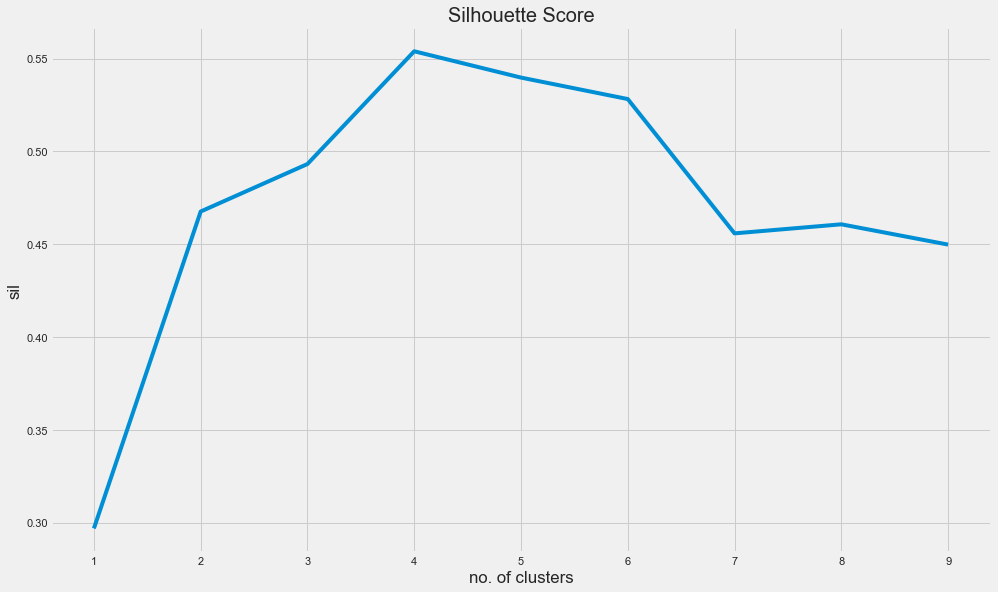

In [31]:
#silhoutte method
from sklearn.metrics import silhouette_score

sil = []
kmax=10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))

plt.plot(range(1,10), sil)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('no. of clusters')
plt.ylabel('sil')
plt.show()

In [32]:
!pip install plotly

In [33]:
#3-D plot
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)


In [34]:
x = df[['Age','Spending Score (1-100)','Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [35]:
df['labels'] = labels
trace1 = go.Scatter3d(x = df['Age'], y=df['Spending Score (1-100)'], z=df['Annual Income (k$)'],
                     mode = 'markers', marker=dict(color = df['labels'], size=10, line=dict(color=df['labels'], width=12),
                                                  opacity=0.8))
df2 = [trace1]
layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)